# Lead Scoring Case Study

In [1]:
# Importing warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None

In [3]:
# Reading the dataset

leads = pd.read_csv("Leads.csv", encoding = "utf-8", engine = "python")
leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [4]:
# Looking at the first 5 columns

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Checking the shape of the dataset

leads.shape

(9240, 37)

In [6]:
# describe() of the dataset

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


###### As we can see from the above table, some variable columns like 'totalVisits','Total Time Spent on Website' and 'Page Views Per Visit' are having outliers while others not so much.

###### Now, from our above observations from two tables we can see that there are some count mismatch and also some columns are redundant. Hence, first we will try to remove those redundant columns and after that we will check the missing values in the dataset.

In [7]:
# info() of the dataset

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

###### As we can see from the above, there are 7 numerical variables columns and remaining 30 columns are having categorical variables.

### Data Cleaning and Preparation

In [8]:
# Checking the number of missing values in the dataset

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

###### As you can see there are a lot of columnw which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [9]:
# Checking the percentage of null values in the dataset

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
# The column "City", "Country", "Prospect ID", "Lead Number","I agree to pay the amount through cheque" & 
# "a free copy of Mastering The Interview"  would be of no use to us, so we will drop it

leads.drop(["City", "Country", "Prospect ID", "Lead Number", "I agree to pay the amount through cheque",
            "A free copy of Mastering The Interview"], axis = 1, inplace = True)
leads

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,02.Medium,01.High,15.0,18.0,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,02.Medium,01.High,15.0,17.0,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,19.0,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,02.Medium,01.High,13.0,20.0,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,02.Medium,02.Medium,15.0,16.0,SMS Sent


###### Now, there are some columns / categorical variables having label as "Select" which means the customer was not selected any option hence it is better to put it as null value (NaN), because there was no suitable option present to select for the customer searching for.

In [11]:
# Finding the columns that are having the label "Select" in them

cols = list(leads.columns)
test = ["Select"]
text = []
for i in range(len(cols)):
    if len(leads[cols[i]].isin(test).unique()) > 1:
        text.append(cols[i])
  
text # column names having label "Select"

['Specialization', 'How did you hear about X Education', 'Lead Profile']

###### The columns having "Select" as a lable are "Specialization", "How did you hear about X Education", "Lead Profile"

In [12]:
# Now replacing label "Select" with NaN in separate dataframes

df_1 = pd.DataFrame(leads["Specialization"])
df_2 = pd.DataFrame(leads["How did you hear about X Education"])
df_3 = pd.DataFrame(leads["Lead Profile"])

df_1 = df_1.replace(df_1.loc[df_1["Specialization"]=="Select"], value = np.nan)
df_2 = df_2.replace(df_2.loc[df_2["How did you hear about X Education"]=="Select"], value = np.nan)
df_3 = df_3.replace(df_3.loc[df_3["Lead Profile"]=="Select"], value = np.nan)

In [13]:
# After replacing in temporary dataframe, we update our original dataset with new set of data from dataset df_1

leads["Specialization"] = df_1['Specialization']
leads["How did you hear about X Education"] = df_2["How did you hear about X Education"]
leads["Lead Profile"] = df_3["Lead Profile"]

In [14]:
# Checking the dataframe after replacing

leads

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,02.Medium,01.High,15.0,18.0,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,02.Medium,01.High,15.0,17.0,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,19.0,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,02.Medium,01.High,13.0,20.0,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,02.Medium,02.Medium,15.0,16.0,SMS Sent


In [15]:
# Checking the number of columns having more than 30% of missing values

drop_cols = leads.isnull().sum()
drop_cols = drop_cols[drop_cols.values/len(leads)>0.30]
len(drop_cols)

9

In [16]:
# Dropping the columns having more than 30% of missing values

drop_columns = list(drop_cols.keys())
leads = leads.drop(drop_columns, 1)  
round(leads.isnull().sum()/len(leads)*100, 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

In [17]:
# Checking the shape of dataframe after droppping

leads.shape

(9240, 22)

###### Now, for columns having below 30% missing values - let's impute maximum number of occurences for a particluar column where missing values are found.

In [18]:
# Let's start with first columns of missing values

# "Lead Source" column

leads["Lead Source"].value_counts()  

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
testone                 1
youtubechannel          1
WeLearn                 1
blog                    1
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

###### Google is having highest number of occurences, hence we will impute the missing values with label 'Google'

In [19]:
# "TotalVisits" column

leads["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

###### 0.0 is having highest number of occurences, hence we will impute the missing values with label '0.0'

In [20]:
# "Page Views Per Visit" column

leads["Page Views Per Visit"].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
1.27       1
8.21       1
2.14       1
2.63       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

###### 0.0 is having highest number of occurences, hence we will impute the missing values with label '0.0'

In [21]:
# "Last Activity" column

leads["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

###### Email Opened is having highest number of occurences, hence we will impute the missing values with label 'Email Opened'

In [22]:
# "What is your current occupation" column

leads["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

###### Unemployed is having highest number of occurences, hence we will impute the missing values with label 'Unemployed'

In [23]:
# "What matters most to you in choosing a course" column

leads["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

###### Better Career Prospects is having highest number of occurences, hence we will impute the missing values with label 'Better Career Prospects'

In [24]:
# Now, imputing these values in our missing values dataset for respective categories

missing_values = {"Lead Source" : "Google", "TotalVisits" : "0.0", "Page Views Per Visit" : "0.0", "Last Activity" : "Email Opened",
                  "What is your current occupation" : "Unemployed", "What matters most to you in choosing a course" : "Better Career Prospects"}

leads = leads.fillna(value = missing_values)
leads

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Last Notable Activity
0,API,Olark Chat,No,No,0,0,0,0,Page Visited on Website,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5,674,2.5,Email Opened,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2,1532,2,Email Opened,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1,305,1,Unreachable,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2,1428,1,Converted to Lead,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8,1845,2.67,Email Marked Spam,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2,238,2,SMS Sent,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2,199,2,SMS Sent,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3,499,3,SMS Sent,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,SMS Sent


In [25]:
# chekcing for missing values after imputing values to the missing area

leads.isnull().sum()  

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Conte

###### Now, all columns are not having any missing values, we are good to go for our next analysis

In [26]:
leads["Lead Source"].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
testone                 1
youtubechannel          1
WeLearn                 1
blog                    1
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

###### We found one column "Lead Source" is having same label name "Google" but in different format ("google"), so we need to make them in a same format

In [27]:
# Applying lambda to captilize the first character of the column 'Lead Source'

leads["Lead Source"] = leads["Lead Source"].apply(lambda x:x.capitalize())
leads["Lead Source"].value_counts()

Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Press_release           2
Social media            2
Live chat               2
Blog                    1
Pay per click ads       1
Welearnblog_home        1
Welearn                 1
Testone                 1
Youtubechannel          1
Nc_edm                  1
Name: Lead Source, dtype: int64

###### Now, all data labels are in good shape and this is our final cleaning step of the dataset

### Data Transformation

In [28]:
# Assigning numerical variables to categories with 'Yes' to 1 and 'No' to 0 or converting binary variables (Yes/No) to (1/0)
# Yes : 1 , No : 0

# Creating dictionary for two categories

category = {"No" : 0,"Yes" : 1}   

# Column 'Do Not Email'

leads["Do Not Email"] = leads["Do Not Email"].map(category)

# Column 'Do Not Call'

leads["Do Not Call"] = leads["Do Not Call"].map(category)

# Column 'Search'

leads["Search"] = leads["Search"].map(category)

# Column 'Magazine'

leads["Magazine"] = leads["Magazine"].map(category)

# Column 'Newspaper Article'

leads["Newspaper Article"] = leads["Newspaper Article"].map(category)

# Column 'X Education Forums'

leads["X Education Forums"] = leads["X Education Forums"].map(category)

# Column 'Newspaper'

leads["Newspaper"] = leads["Newspaper"].map(category)

# Column 'Digital Advertisement'

leads["Digital Advertisement"] = leads["Digital Advertisement"].map(category)

# Column 'Through Recommendations'

leads["Through Recommendations"] = leads["Through Recommendations"].map(category)

# Column 'Receive More Updates About Our Courses'

leads["Receive More Updates About Our Courses"] = leads["Receive More Updates About Our Courses"].map(category)

# Column 'Update me on Supply Chain Content'

leads["Update me on Supply Chain Content"] = leads["Update me on Supply Chain Content"].map(category)

# Column 'Get updates on DM Content'

leads["Get updates on DM Content"] = leads["Get updates on DM Content"].map(category)

###### After converting the binary categories from "Yes" to 1 and "No" to 0, we will use now dummy variables for mutiple levels of categories

In [29]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   int64 
 3   Do Not Call                                    9240 non-null   int64 
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   What is your current occupation                9240 non-null   

In [30]:
# Creating a dummy variables for 8 categories and dropping the first level

dummy = pd.get_dummies(leads[["Lead Origin", "Lead Source", "Last Activity", "What is your current occupation",
                              "What matters most to you in choosing a course", "Last Notable Activity"]], drop_first = True)

# Adding these dummies to the original dataset

leads = pd.concat([leads, dummy], axis = 1)
leads

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark chat,0,0,0,0,0,0,Page Visited on Website,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Modified,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic search,0,0,0,5,674,2.5,Email Opened,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct traffic,0,0,1,2,1532,2,Email Opened,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Email Opened,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct traffic,0,0,0,1,305,1,Unreachable,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2,1428,1,Converted to Lead,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Modified,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [31]:
leads.shape

(9240, 83)

###### Now, dropping duplicate columns or repeated columns

In [32]:
# We have created dummies for below categories hence removing the original column

duplicates = ["Lead Origin", "Lead Source", "Last Activity", "What is your current occupation",
              "What matters most to you in choosing a course", "Last Notable Activity"]


leads = leads.drop(duplicates, 1)
leads

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2,1532,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,305,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2,1428,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,1,8,1845,2.67,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9236,0,0,0,2,238,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,2,199,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9238,0,0,1,3,499,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0

In [33]:
leads.shape

(9240, 77)

In [34]:
# Dropping redundant variables

redundant = ["Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "Magazine"]
leads = leads.drop(redundant, 1)
leads

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2,1532,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,305,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2,1428,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,1,8,1845,2.67,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9236,0,0,0,2,238,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,2,199,2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9238,0,0,1,3,499,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [35]:
leads.shape

(9240, 73)

In [36]:
# Converting some categories to numercial as they are imported as an 'Object'

leads[["TotalVisits", "Page Views Per Visit"]] = leads[["TotalVisits", "Page Views Per Visit"]].astype("float")
leads.info()
#leads["Page Views Per Visit"] = leads["Page Views Per Visit"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 73 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   int64  
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Search                                                                  

### Checking Outliers

In [37]:
round(leads.describe(percentiles = [0.15,0.35,0.55,0.75,0.95]), 2)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.0,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00
mean,0.08,0.00,0.39,3.39,487.70,2.33,0.00,0.00,0.00,0.00,0.00,0.00,0.53,0.08,0.01,0.00,0.00,0.00,0.28,0.01,0.31,0.00,0.00,0.19,0.12,0.00,0.00,0.06,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.05,0.04,0.03,0.00,0.38,0.00,0.01,0.00,0.11,0.07,0.00,0.30,0.01,0.01,0.00,0.00,0.00,0.00,0.02,0.9,0.08,0.00,0.00,0.01,0.02,0.00,0.31,0.00,0.00,0.00,0.37,0.02,0.03,0.00,0.24,0.00,0.01,0.00
std,0.27,0.01,0.49,4.84,548.02,2.16,0.04,0.01,0.01,0.01,0.02,0.03,0.50,0.27,0.08,0.01,0.01,0.02,0.45,0.08,0.46,0.01,0.01,0.39,0.33,0.01,0.01,0.23,0.12,0.01,0.01,0.01,0.01,0.12,0.01,0.21,0.18,0.17,0.01,0.49,0.01,0.11,0.06,0.31,0.25,0.01,0.46,0.10,0.08,0.03,0.01,0.03,0.04,0.15,0.3,0.27,0.01,0.01,0.08,0.14,0.01,0.46,0.01,0.01,0.04,0.48,0.14,0.18,0.01,0.42,0.06,0.07,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

###### As we can see there are outliers in 2 variables "TotalVisits" and "Page Views Per Visit"

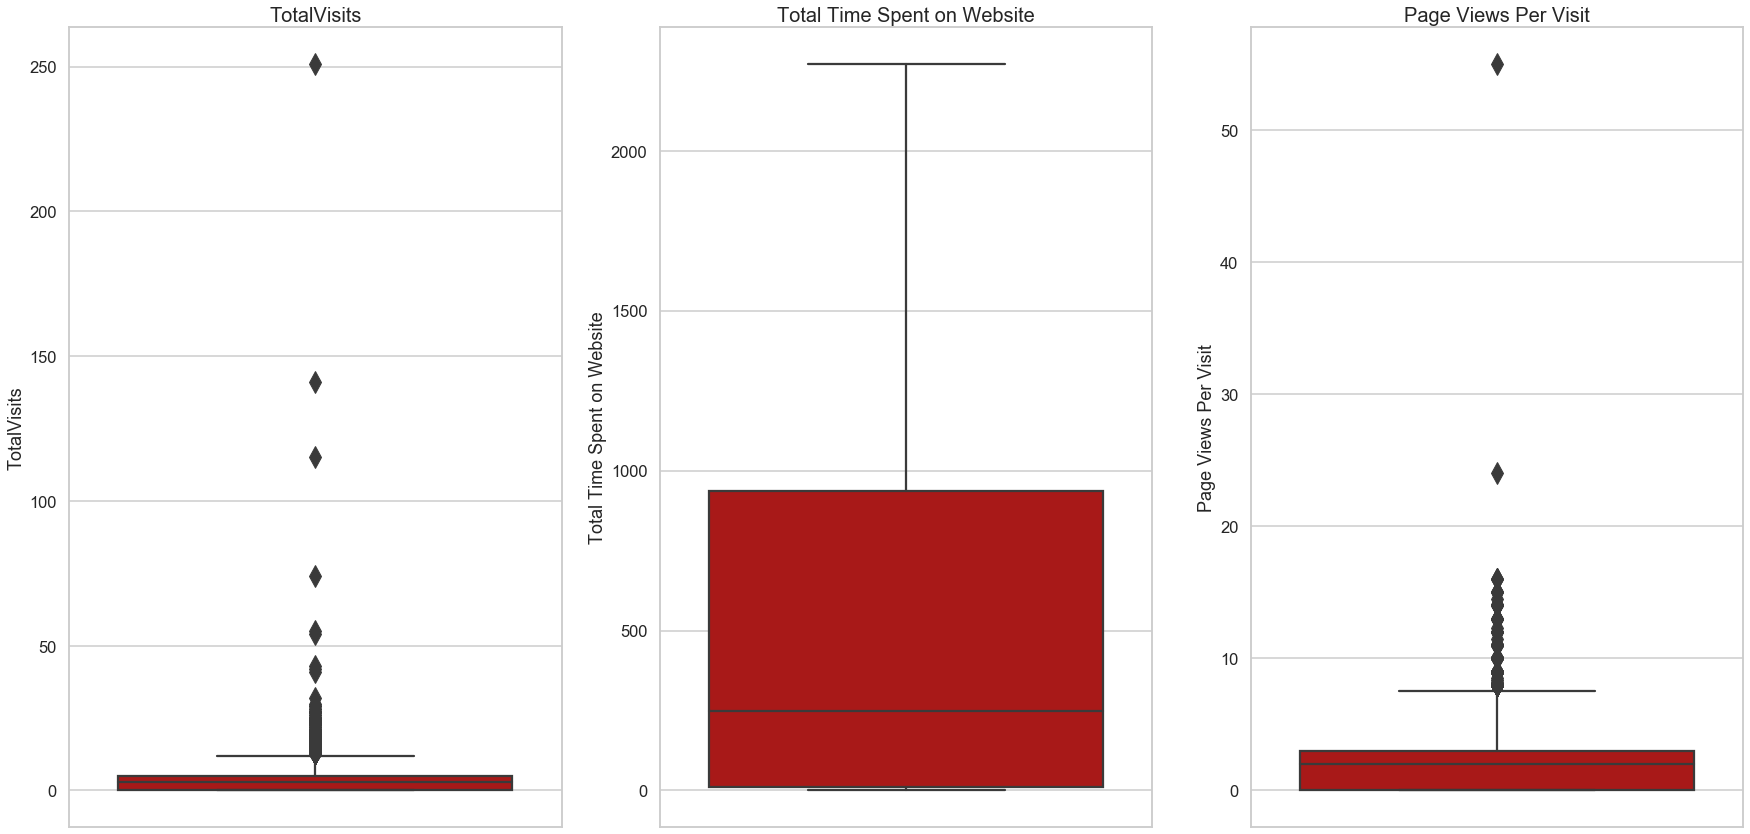

In [38]:
# Visualizing the outliers using boxplot to understand the outliers

plt.figure(figsize = (30,50))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

col = {0 : "TotalVisits", 1 : "Total Time Spent on Website", 2 : "Page Views Per Visit"}

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col[i], fontsize = 20)
    sns.boxplot(x = leads[col[i]], data = leads, palette='gist_heat',orient='v', fliersize = 15) 

###### From the above boxplots we can now confirm that we have two outlier variables in our dataset ('TotalVisits' and 'Page Views Per Visit'). Now as per business requirement, we cannot drop these outliers because it may impact our analysis, so we will create bins for these two outliers

In [39]:
# Creating bins

# For 'TotalVisits' variable

# As we have range from 0 to 251 for'TotalVisits' variable

ranges_total_visits = {"TotalVisits_0_50" : 50, "TotalVisits_50_100" : 100, "TotalVisits_100_150" : 150,
                       "TotalVisits_150_200" : 200, "TotalVisits_200_250" : 250, "TotalVisits_250_300" : 300}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits.keys()))):
    leads[list(ranges_total_visits.keys())[i]] = leads["TotalVisits"].map(lambda x: 1 if (x < list(ranges_total_visits.values())[i] and x >= (list(ranges_total_visits.values())[i] - 50)) else 0)

In [40]:
# For 'Page Views Per Visit' variable

# As we have range from 0 to 55 for'Page Views Per Visit' variable

ranges_total_visits_1 = {"Page Views Per Visit_0_10" : 10, "Page Views Per Visit_10_20" : 20,"Page Views Per Visit_20_30": 30,
                         "Page Views Per Visit_30_40" : 40, "Page Views Per Visit_40_50" : 50, "Page Views Per Visit_50_60" : 60}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits_1.keys()))):
    leads[list(ranges_total_visits_1.keys())[i]] = leads["Page Views Per Visit"].map(lambda x: 1 if (x < list(ranges_total_visits_1.values())[i] and x >= (list(ranges_total_visits_1.values())[i] - 10)) else 0)

###### From above, creating bins surely removed the outliers and hence we are now good to go. Before going to another step let's remove redundant columns/varaibles. 

In [41]:
redundant = ["TotalVisits", "Page Views Per Visit", "TotalVisits_150_200", "TotalVisits_200_250", "Page Views Per Visit_30_40", "Page Views Per Visit_40_50"]
leads = leads.drop(redundant, axis = 1)
leads.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0,0,0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,305,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,1,1428,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


### Data Preparation

### Train-Test Split 

In [42]:
# Importing train-test-split method from sklearn - model selection

from sklearn.model_selection import train_test_split

In [43]:
# Separating target varaible from dependent variable by putting the target varaible "Converted" to a new series "y"

y = leads["Converted"]     
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [44]:
# Putting dependent variable in a new dataset called "X"

X = leads.drop("Converted", 1)
X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,0,0,674,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0,0,1532,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,305,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,1428,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [45]:
# Splitting the datset into train and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

### Feature Standardization

In [46]:
# Importing Standard Scaler method from sklearn - preprocessing library

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  

In [47]:
# Now, Scalling the "Total Time Spent on Website" variables with standard scaler and fitting - tranforming the X - train dataset

X_train[["Total Time Spent on Website"]] = scaler.fit_transform(X_train[["Total Time Spent on Website"]])
X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
1871,0,0,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6795,0,0,0.005716,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3516,0,0,-0.691418,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
8105,0,0,1.365219,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3934,0,0,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [48]:
# Checking the conversion rate from "Converted" column as it denotes the target variable

(sum(y)/len(y.index))*100

38.53896103896104

###### We have conversion rate of almost 39%

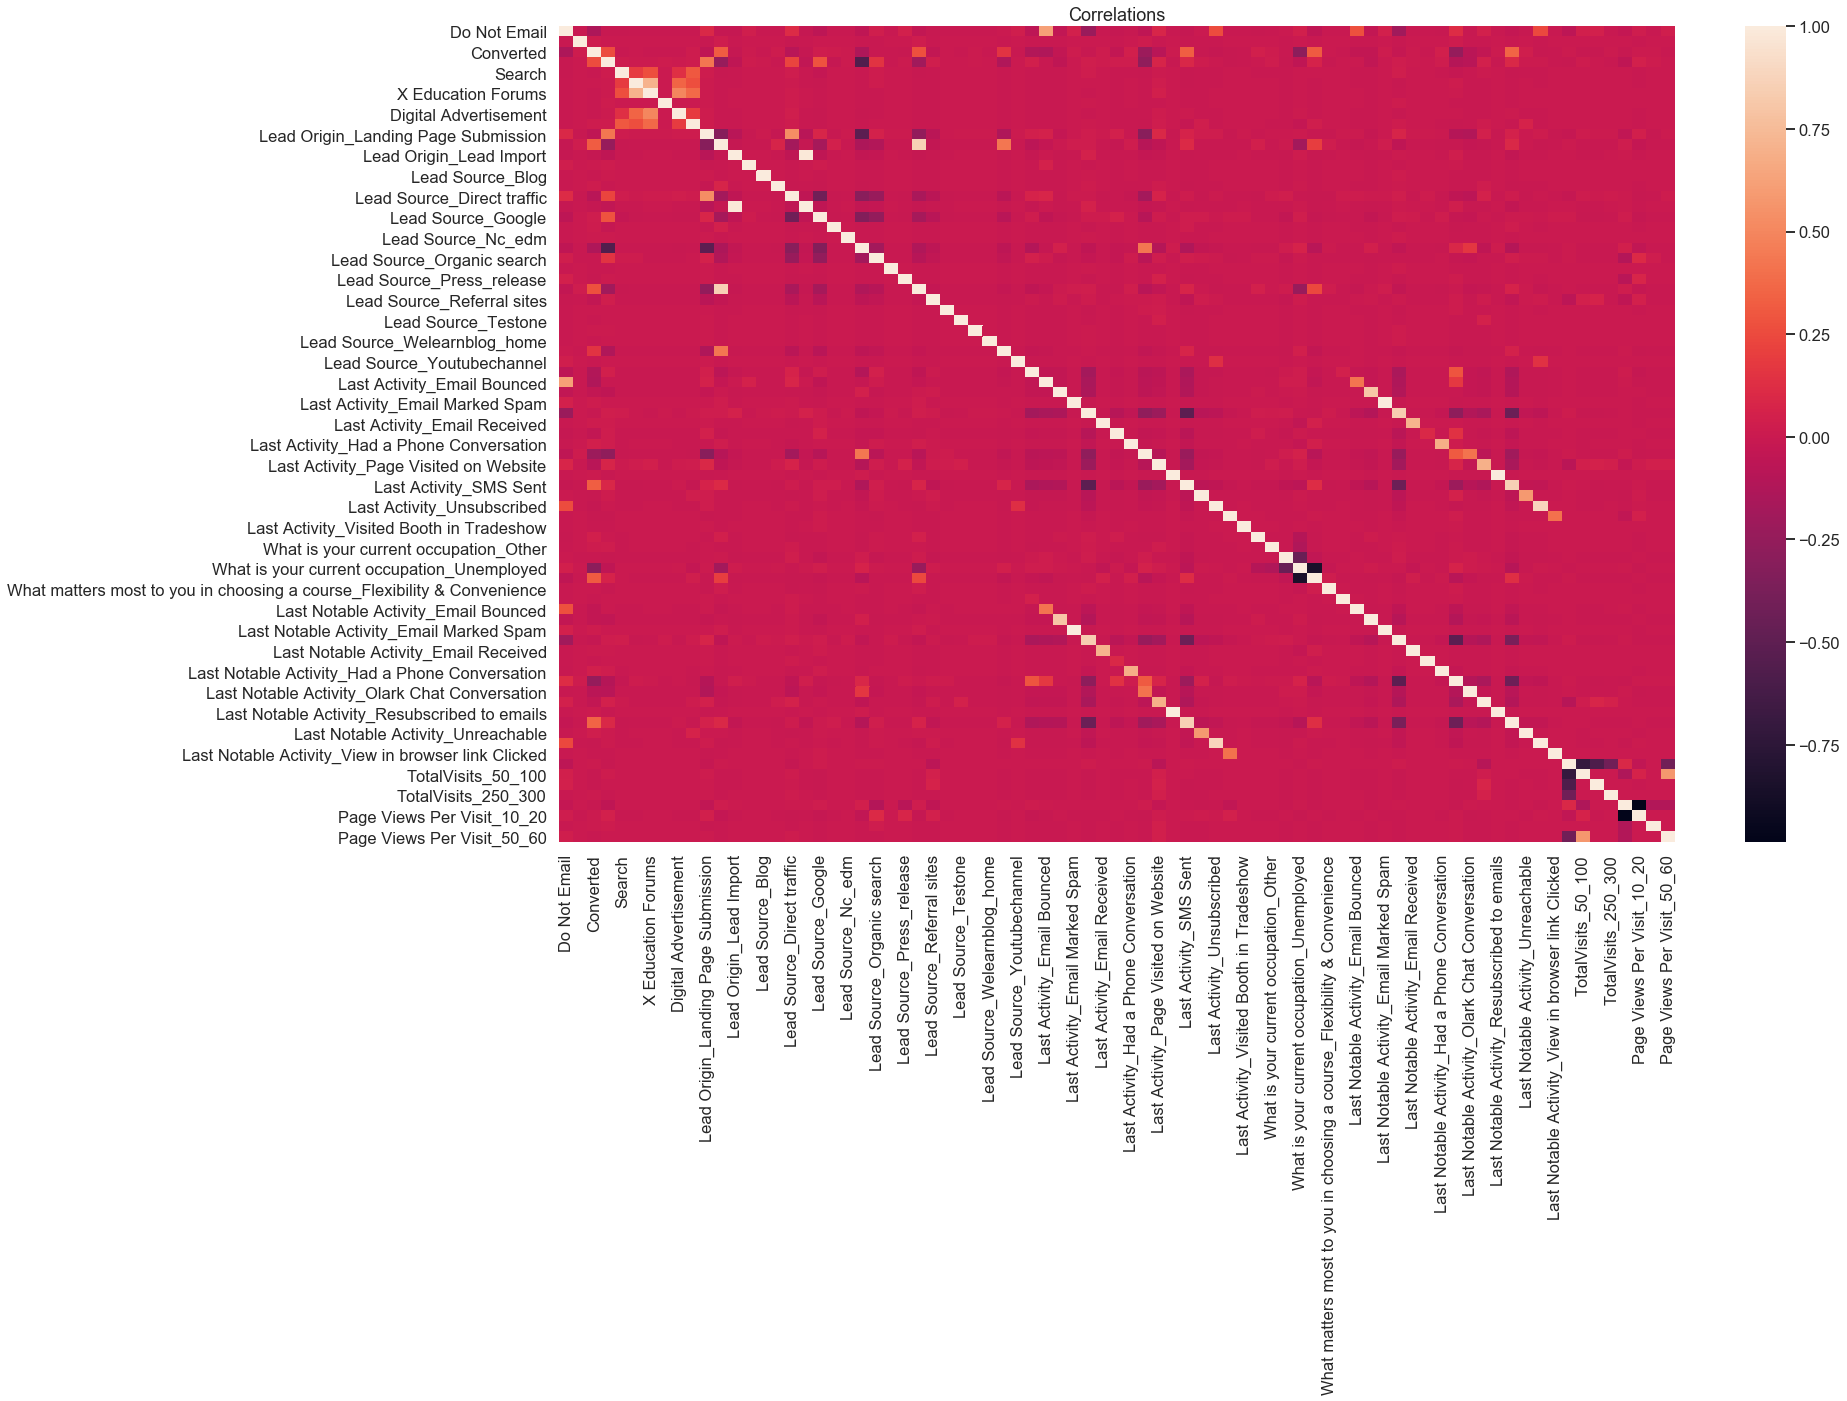

In [49]:
# Correlation of the dataset

plt.figure(figsize = (25,15))
plt.title("Correlations")
sns.heatmap(leads.corr(method = "spearman"))
plt.show()

###### From the above heatmap, we saw that there are two variables having high correlation, so we going to drop them.

In [50]:
# Dropping highly correlated dummy variable/categories

corr_dummy = ["Lead Source_Olark chat", "What is your current occupation_Unemployed"]

# Dropping from X train set

X_train = X_train.drop(corr_dummy, 1)

# Dropping from X test set
    
X_test = X_test.drop(corr_dummy, 1)      

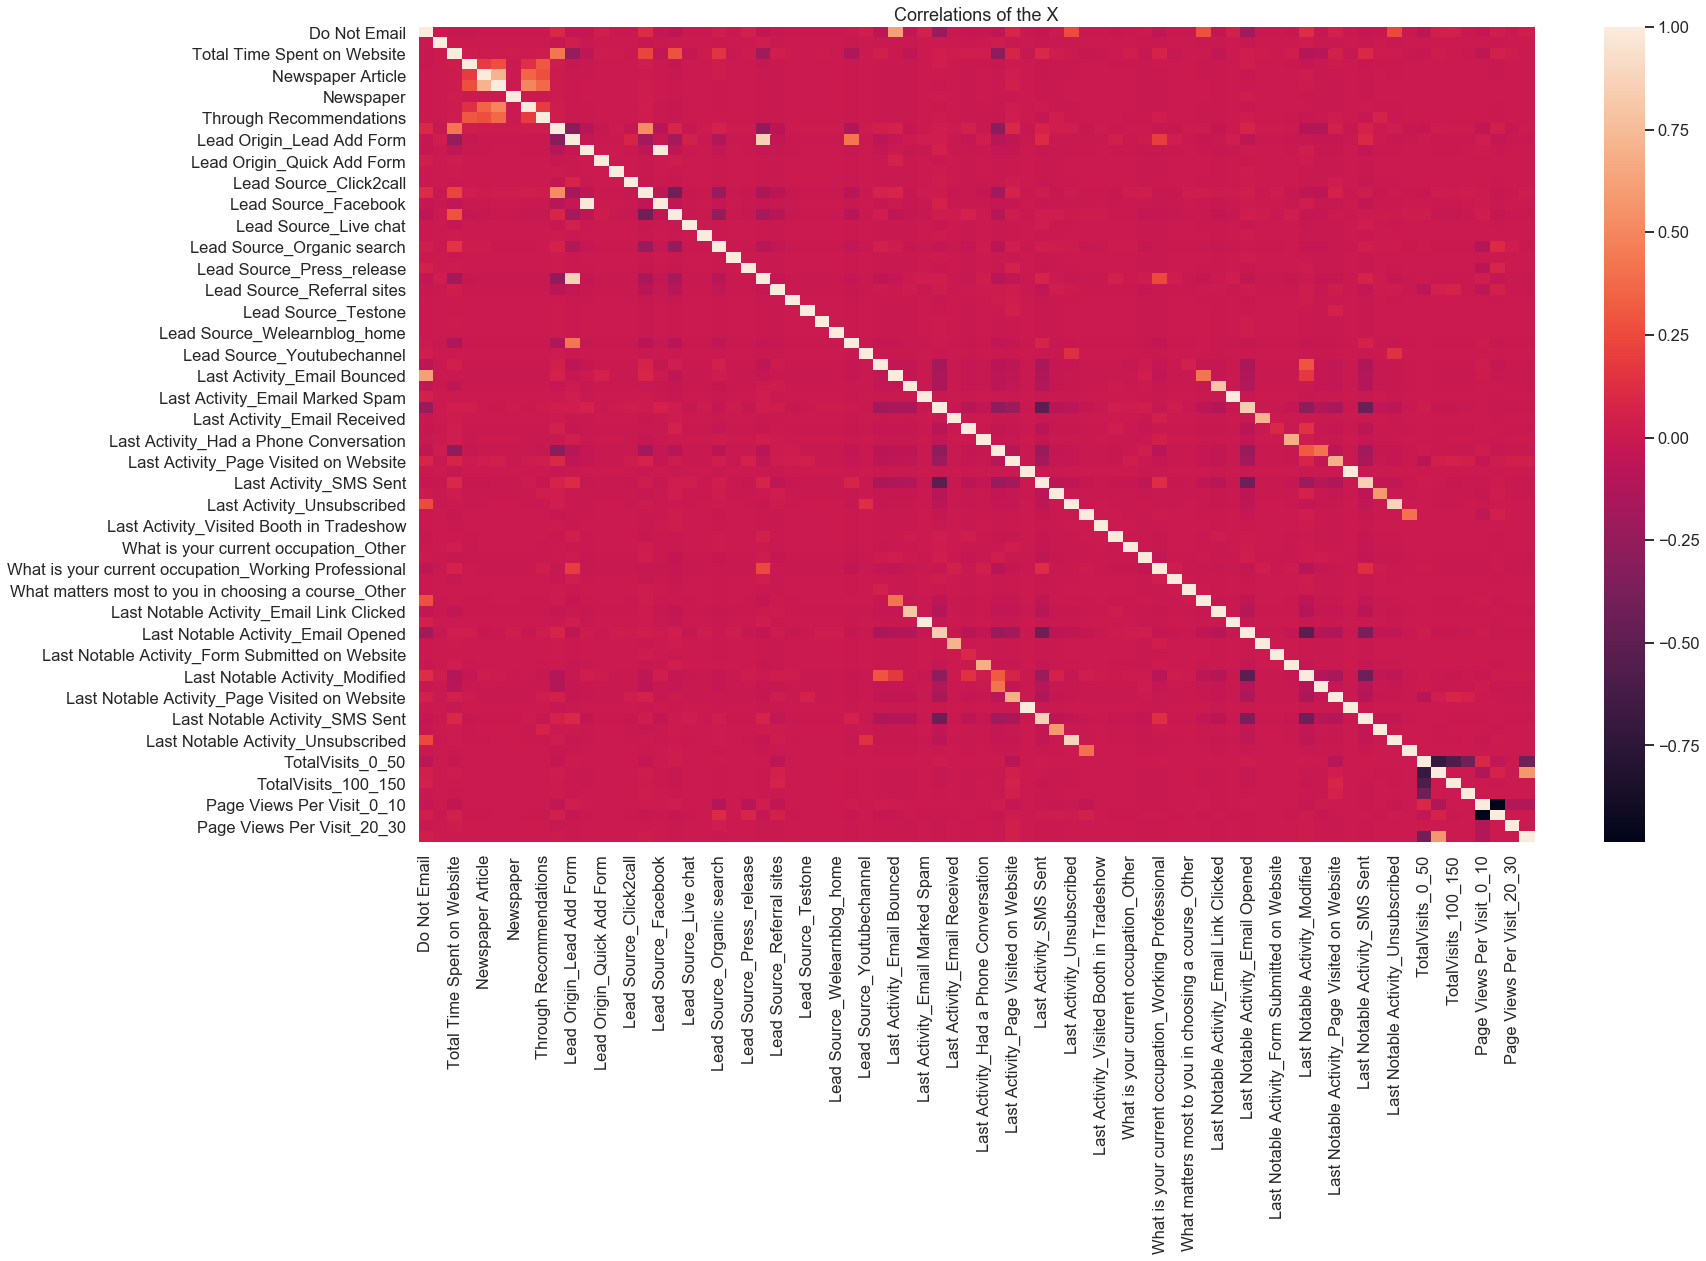

In [51]:
# Checking again the correlation of the dataset

plt.figure(figsize = (25,15))
plt.title("Correlations of the X")
sns.heatmap(leads[X_train.columns].corr(method = "spearman"))
plt.show()

###### Now, both of them are removed and new correlation is shown above by heatmap, We will now proceed with building our model based on the p-values and VIFs, we will again check for correlation as from above heatmap it is difficult to spot the highly correlated variables.

### Building a model

In [52]:
# importing necessary library

import statsmodels.api as sm

In [53]:
# Building the model

logis = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logis.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6398
Model Family:                Binomial   Df Model:                           69
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 17 Nov 2020   Deviance:                          nan
Time:                        00:28:53   Pearson chi2:                 7.46e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    8.506e+21   2.69e+14   3.16e+07      0.000    8.51e+21    8.51e+21
Do Not Email                                                            -3.705e+14   4.42e+06  -8.38e+07      0.000   -3.71e+14   -3.71e+14
Do Not Call                                                              1.131e+16   4.75e+07   2.38e+08      0.000    1.13e+16    1.13e+16
Total Time Spent on Website                                             -3.313e+13   8.33e+05  -3.98e+07      0.000   -3.31e+13   -3.31e+13
Search                                                                   1.258e+15    2.2e+07   5.72e+07      0.000    1.26e+15    1.26e+15
Newspaper Article                                                        9.754e+15   6.72e+07   1.45e+08      0.000    9.75e+15    9.75e+15
X Education Forums                                                      -1.374e+16   1.11e+08  -1.24e+08      0.000   -1.37e+16   -1.37e+16
Newspaper                                                               -1.828e+15   6.71e+07  -2.72e+07      0.000   -1.83e+15   -1.83e+15
Digital Advertisement                                                    -3.97e+15   4.75e+07  -8.36e+07      0.000   -3.97e+15   -3.97e+15
Through Recommendations                                                  7.466e+14   2.85e+07   2.62e+07      0.000    7.47e+14    7.47e+14
Lead Origin_Landing Page Submission                                     -2.037e+14   2.21e+06   -9.2e+07      0.000   -2.04e+14   -2.04e+14
Lead Origin_Lead Add Form                                                 8.78e+14   1.29e+07    6.8e+07      0.000    8.78e+14    8.78e+14
Lead Origin_Lead Import                                                  4.833e+14    4.8e+07   1.01e+07      0.000    4.83e+14    4.83e+14
Lead Origin_Quick Add Form                                               6.893e+15   6.74e+07   1.02e+08      0.000    6.89e+15    6.89e+15
Lead Source_Blog                                                        -2.262e+15   6.72e+07  -3.37e+07      0.000   -2.26e+15   -2.26e+15
Lead Source_Click2call                                                   1.886e+15   4.09e+07   4.61e+07      0.000    1.89e+15    1.89e+15
Lead Source_Direct traffic                                               5.747e+14   3.13e+06   1.84e+08      0.000    5.75e+14    5.75e+14
Lead Source_Facebook                                                     1.663e+14    4.8e+07   3.46e+06      0.000    1.66e+14    1.66e+14
Lead Source_Google                                                       5.634e+14   3.04e+06   1.86e+08      0.000    5.63e+14    5.63e+14
Lea

###### From the above summary presented by generalizing linear model, we can tell that there are so many variable with insignificant p-values. Here we will use rfe method for feature selection as we have 70 variables and checking one by one is not an efficient way to do so.

### Using RFE method

In [54]:
# Importing necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()                 

## Running RFE with two different variables count to find best model

### RFE Test - 1

In [55]:
# Running rfe for 19 variables

rfem = RFE(logreg, 19)
rfem = rfem.fit(X_train, y_train)   

In [56]:
# checking for true and false assigned to the variables after rfe

list(zip(X_train.columns, rfem.support_, rfem.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 20),
 ('Newspaper Article', False, 16),
 ('X Education Forums', False, 42),
 ('Newspaper', False, 8),
 ('Digital Advertisement', False, 9),
 ('Through Recommendations', False, 23),
 ('Lead Origin_Landing Page Submission', False, 41),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 35),
 ('Lead Origin_Quick Add Form', False, 17),
 ('Lead Source_Blog', False, 13),
 ('Lead Source_Click2call', False, 22),
 ('Lead Source_Direct traffic', True, 1),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live chat', False, 48),
 ('Lead Source_Nc_edm', False, 30),
 ('Lead Source_Organic search', True, 1),
 ('Lead Source_Pay per click ads', False, 33),
 ('Lead Source_Press_release', False, 25),
 ('Lead Source_Reference', False, 50),
 ('Lead Source_Referral sites', True, 1),
 ('Lead Source_Social media', False, 18),
 ('Le

In [57]:
# selecting columns only which are "True" in rfem.support_ i.e True columns were selected for creating a model

col = X_train.columns[rfem.support_]

# Adding constant

X_train_1 = sm.add_constant(X_train[col])   

In [58]:
# creating 1st model after RFE

logis1 = sm.GLM(y_train, X_train_1, family = sm.families.Binomial())
reg1 = logis1.fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2679.1
Date:                Tue, 17 Nov 2020   Deviance:                       5358.3
Time:                        00:29:01   Pearson chi2:                 7.26e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1701      0.104     11.259      0.000       0.966       1.374
Do Not Email                                            -1.2346      0.193     -6.382      0.000      -1.614      -0.855
Total Time Spent on Website                              1.0853      0.039     27.645      0.000       1.008       1.162
Lead Origin_Lead Add Form                                2.7400      0.195     14.053      0.000       2.358       3.122
Lead Source_Direct traffic                              -1.2903      0.114    -11.343      0.000      -1.513      -1.067
Lead Source_Google                                      -0.9024      0.107     -8.460      0.000      -1.111      -0.693
Lead Source_Organic search                              -1.0645      0.132     -8.043      0.000      -1.324      -0.805
Lead Source_Referral sites                              -1.1262      0.312     -3.605      0.000      -1.739      -0.514
Lead Source_Welingak website                             1.8681      0.744      2.512      0.012       0.410       3.326
Last Activity_Converted to Lead                         -1.0016      0.226     -4.435      0.000      -1.444      -0.559
Last Activity_Email Bounced                             -1.0933      0.345     -3.171      0.002      -1.769      -0.418
Last Activity_Olark Chat Conversation                   -1.1949      0.193     -6.182      0.000      -1.574      -0.816
What is your current occupation_Housewife               22.8758   1.37e+04      0.002      0.999   -2.69e+04    2.69e+04
What is your current occupation_Working Professional     2.7957      0.188     14.846      0.000       2.427       3.165
Last Notable Activity_Email Link Clicked                -1.8728      0.275     -6.818      0.000      -2.411      -1.334
Last Notable Activity_Email Opened                      -1.3280      0.087    -15.274      0.000      -1.498      -1.158
Last Notable Activity_Had a Phone Conversation           2.0560      1.105      1.861      0.063      -0.110       4.222
Last Notable Activity_Modified                          -1.7097      0.099    -17.196      0.000      -1.905      -1.515
Last Notable Activity_Olark Chat Conversation           -1.4494      0.374     -3.876      0.000      -2.182      -0.717
Last Notable Activity_Page Visited on Website           -1.5749      0.192     -8.219      0.000      -1.950      -1.199
========================================================================================================================
"""

###### Now, From the above summary presented there are some features having high p -values, we will drop features which is having insignificant values one by one and create new model again and again until all the features attain significant p- value

## Calculating VIF

In [59]:
# importing VIF library

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
# Calculating VIFs

vif = pd.DataFrame()
vif["Features"] = X_train_1[col].columns  
vif["VIF"] = [variance_inflation_factor(X_train_1[col].values, i) for i in range(X_train_1[col].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
16,Last Notable Activity_Modified,2.58
0,Do Not Email,1.89
10,Last Activity_Olark Chat Conversation,1.82
9,Last Activity_Email Bounced,1.80
4,Lead Source_Google,1.79
3,Lead Source_Direct traffic,1.73
14,Last Notable Activity_Email Opened,1.73
2,Lead Origin_Lead Add Form,1.46
17,Last Notable Activity_Olark Chat Conversation,1.35
5,Lead Source_Organic search,1.30


###### As we can see that all features are having vif values less than 5, hence there is no multicollinearity issue in the dataset

###### As expained before we will drop the highest in-significant features i.e "What is your current occupation_Housewife" having 0.999 p - value.

In [61]:
# Dropping the most insignificant values ("What is your current occupation_Housewife") and constant

X_train_2 = X_train_1.drop(["const", "What is your current occupation_Housewife"], 1)

In [62]:
# Creating a new model

# Adding constant

X_train_2 = sm.add_constant(X_train_2)      

# Using GLM, creating model

logis2 = sm.GLM(y_train, X_train_2, families = sm.families.Binomial())  

# Fitting our model

reg2 = logis2.fit()       

# Showing the summary of the model created

reg2.summary()                                                    

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Gaussian   Df Model:                           18
Link Function:               identity   Scale:                         0.13833
Method:                          IRLS   Log-Likelihood:                -2770.9
Date:                Tue, 17 Nov 2020   Deviance:                       892.07
Time:                        00:29:02   Pearson chi2:                     892.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6560      0.015     43.729      0.000       0.627       0.685
Do Not Email                                            -0.1504      0.023     -6.609      0.000      -0.195      -0.106
Total Time Spent on Website                              0.1842      0.005     35.569      0.000       0.174       0.194
Lead Origin_Lead Add Form                                0.4043      0.022     18.503      0.000       0.361       0.447
Lead Source_Direct traffic                              -0.1856      0.016    -11.910      0.000      -0.216      -0.155
Lead Source_Google                                      -0.1245      0.015     -8.360      0.000      -0.154      -0.095
Lead Source_Organic search                              -0.1509      0.018     -8.238      0.000      -0.187      -0.115
Lead Source_Referral sites                              -0.1718      0.041     -4.232      0.000      -0.251      -0.092
Lead Source_Welingak website                             0.1848      0.043      4.262      0.000       0.100       0.270
Last Activity_Converted to Lead                         -0.1096      0.024     -4.548      0.000      -0.157      -0.062
Last Activity_Email Bounced                             -0.0636      0.033     -1.953      0.051      -0.127       0.000
Last Activity_Olark Chat Conversation                   -0.1395      0.020     -6.881      0.000      -0.179      -0.100
What is your current occupation_Working Professional     0.3435      0.018     19.021      0.000       0.308       0.379
Last Notable Activity_Email Link Clicked                -0.3005      0.036     -8.447      0.000      -0.370      -0.231
Last Notable Activity_Email Opened                      -0.2243      0.013    -17.590      0.000      -0.249      -0.199
Last Notable Activity_Had a Phone Conversation           0.2275      0.113      2.020      0.043       0.007       0.448
Last Notable Activity_Modified                          -0.2816      0.014    -20.757      0.000      -0.308      -0.255
Last Notable Activity_Olark Chat Conversation           -0.2654      0.040     -6.651      0.000      -0.344      -0.187
Last Notable Activity_Page Visited on Website           -0.2662      0.026    -10.138      0.000      -0.318      -0.215
========================================================================================================================
"""

###### Again, we can see from above summary that variable "Last Notable Activity_Had a Phone Conversation" is in-significant hence dropping it and recreating a new model

In [63]:
# Dropping the most insignificant values ("Last Notable Activity_Had a Phone Conversation") and constant

X_train_3 = X_train_2.drop(["const", "Last Notable Activity_Had a Phone Conversation"], 1)

In [64]:
# Recreating a new model

# Adding constant

X_train_3 = sm.add_constant(X_train_3) 

# Using GLM, creating model

logis3 = sm.GLM(y_train, X_train_3, families = sm.families.Binomial())    

# Fitting our model

reg3 = logis3.fit()    

# Showing the summary of the model created
reg3.summary()                                                      

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Gaussian   Df Model:                           17
Link Function:               identity   Scale:                         0.13839
Method:                          IRLS   Log-Likelihood:                -2772.9
Date:                Tue, 17 Nov 2020   Deviance:                       892.63
Time:                        00:29:02   Pearson chi2:                     893.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6575      0.015     43.876      0.000       0.628       0.687
Do Not Email                                            -0.1510      0.023     -6.636      0.000      -0.196      -0.106
Total Time Spent on Website                              0.1843      0.005     35.568      0.000       0.174       0.194
Lead Origin_Lead Add Form                                0.4037      0.022     18.470      0.000       0.361       0.446
Lead Source_Direct traffic                              -0.1857      0.016    -11.915      0.000      -0.216      -0.155
Lead Source_Google                                      -0.1241      0.015     -8.334      0.000      -0.153      -0.095
Lead Source_Organic search                              -0.1510      0.018     -8.242      0.000      -0.187      -0.115
Lead Source_Referral sites                              -0.1720      0.041     -4.235      0.000      -0.252      -0.092
Lead Source_Welingak website                             0.1849      0.043      4.262      0.000       0.100       0.270
Last Activity_Converted to Lead                         -0.1097      0.024     -4.552      0.000      -0.157      -0.062
Last Activity_Email Bounced                             -0.0633      0.033     -1.943      0.052      -0.127       0.001
Last Activity_Olark Chat Conversation                   -0.1396      0.020     -6.882      0.000      -0.179      -0.100
What is your current occupation_Working Professional     0.3438      0.018     19.036      0.000       0.308       0.379
Last Notable Activity_Email Link Clicked                -0.3020      0.036     -8.488      0.000      -0.372      -0.232
Last Notable Activity_Email Opened                      -0.2259      0.013    -17.744      0.000      -0.251      -0.201
Last Notable Activity_Modified                          -0.2831      0.014    -20.891      0.000      -0.310      -0.257
Last Notable Activity_Olark Chat Conversation           -0.2669      0.040     -6.688      0.000      -0.345      -0.189
Last Notable Activity_Page Visited on Website           -0.2676      0.026    -10.196      0.000      -0.319      -0.216
========================================================================================================================
"""

###### Again, we can see from above summary that variable "Last Activity_Email Bounced" is in-significant hence dropping it and recreating a new model

In [65]:
# Dropping the most insignificant values ("Last Activity_Email Bounced") and constant

X_train_4 = X_train_3.drop(["const", "Last Activity_Email Bounced"], 1)

In [66]:
# Recreating a new model

# Adding constant

X_train_4 = sm.add_constant(X_train_4) 

# Using GLM, creating model

logis4 = sm.GLM(y_train, X_train_4, families = sm.families.Binomial())    

# Fitting our model

reg4 = logis4.fit()    

# Showing the summary of the model created
reg4.summary()                                                      

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Gaussian   Df Model:                           16
Link Function:               identity   Scale:                         0.13845
Method:                          IRLS   Log-Likelihood:                -2774.8
Date:                Tue, 17 Nov 2020   Deviance:                       893.15
Time:                        00:29:02   Pearson chi2:                     893.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6580      0.015     43.910      0.000       0.629       0.687
Do Not Email                                            -0.1779      0.018     -9.838      0.000      -0.213      -0.142
Total Time Spent on Website                              0.1841      0.005     35.533      0.000       0.174       0.194
Lead Origin_Lead Add Form                                0.4044      0.022     18.505      0.000       0.362       0.447
Lead Source_Direct traffic                              -0.1854      0.016    -11.897      0.000      -0.216      -0.155
Lead Source_Google                                      -0.1234      0.015     -8.287      0.000      -0.153      -0.094
Lead Source_Organic search                              -0.1502      0.018     -8.196      0.000      -0.186      -0.114
Lead Source_Referral sites                              -0.1714      0.041     -4.220      0.000      -0.251      -0.092
Lead Source_Welingak website                             0.1864      0.043      4.296      0.000       0.101       0.271
Last Activity_Converted to Lead                         -0.1065      0.024     -4.428      0.000      -0.154      -0.059
Last Activity_Olark Chat Conversation                   -0.1352      0.020     -6.706      0.000      -0.175      -0.096
What is your current occupation_Working Professional     0.3441      0.018     19.045      0.000       0.309       0.379
Last Notable Activity_Email Link Clicked                -0.3028      0.036     -8.509      0.000      -0.373      -0.233
Last Notable Activity_Email Opened                      -0.2268      0.013    -17.828      0.000      -0.252      -0.202
Last Notable Activity_Modified                          -0.2873      0.013    -21.482      0.000      -0.314      -0.261
Last Notable Activity_Olark Chat Conversation           -0.2707      0.040     -6.792      0.000      -0.349      -0.193
Last Notable Activity_Page Visited on Website           -0.2647      0.026    -10.099      0.000      -0.316      -0.213
========================================================================================================================
"""

###### Now, from the above summary we can say that all the variables present in this model are significant as no variables are having p - value greater than 0.05, hence we can proceed with our next step

## Creating VIF

###### After creating a model with no in significant features lets check the VIF i.e multicollinearity as we have checked earlier there was no such thing were found after creating VIF - all VIF vallues are less than 5 which means our final model is ready

In [67]:
# Dropping constant and saving in new dataset

X_train_4_1 = X_train_4.drop("const", 1)    

In [68]:
# Checking VIF again just to be sure

vif = pd.DataFrame()                        
vif["Features"] = X_train_4_1.columns       
vif["VIF"] = [variance_inflation_factor(X_train_4_1.values,i) for i in range(X_train_4_1.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Modified,2.50
9,Last Activity_Olark Chat Conversation,1.80
4,Lead Source_Google,1.77
12,Last Notable Activity_Email Opened,1.73
3,Lead Source_Direct traffic,1.72
2,Lead Origin_Lead Add Form,1.46
14,Last Notable Activity_Olark Chat Conversation,1.35
5,Lead Source_Organic search,1.29
7,Lead Source_Welingak website,1.24
8,Last Activity_Converted to Lead,1.24


###### As confirmed earlier, there are no signs of multicollinearity as shown from above vif dataframe, hence reg4 is our final model and we are going to use it predict the X train dataset.

### Predicting a Train model

In [69]:
# Predicting the train dataset with our final model

y_train_pred = reg4.predict(X_train_4)

# Creating a new dataset and saving predicted values in it

y_train_pred_final = pd.DataFrame({"Converted" : y_train.values, "Converted_probability" : y_train_pred, "ID" : y_train.index})
y_train_pred_final.head()   

,Converted,Converted_probability,ID
1871,0,0.268197,1871
6795,0,0.246838,6795
3516,0,0.303907,3516
8105,0,0.785984,8105
3934,0,0.207716,3934


### ROC Curve

In [70]:
# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

In [71]:
# Building the ROC Curve

def leads_roc( real, probability):
    fpr, tpr, thresholds = roc_curve(real, probability, drop_intermediate = False )   
    auc_score = roc_auc_score(real, probability )    
    plt.figure(figsize = (8, 4))
    plt.plot(fpr, tpr, label = "ROC curve (area = %0.2f)" % auc_score )
    plt.plot([0, 1], [0, 1], "r--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc = "lower right")
    plt.show()
    return None   

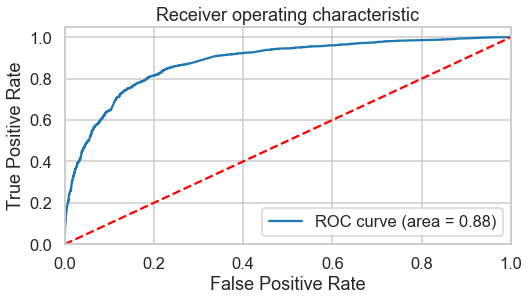

In [72]:
# Calling the roc curve for plotting

leads_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

###### Points to be concluded from above roc curve -
###### - The curve is closer to the left side of the border than to the right side hence our model is having great accuracy
###### - The area under the curve is 88% of the total area

In [73]:
# Finding optimal probability cutoff point

# creating 10 points out of which one we will choose for our cutoff point from 0 to 0.9 with set size 0.1

numbers = [float(x)/10 for x in range(10)]  

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final["Converted_probability"].map(lambda x:1 if x > i else 0)   
y_train_pred_final.head()   

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.268197,1871,1,1,1,0,0,0,0,0,0,0
6795,0,0.246838,6795,1,1,1,0,0,0,0,0,0,0
3516,0,0.303907,3516,1,1,1,1,0,0,0,0,0,0
8105,0,0.785984,8105,1,1,1,1,1,1,1,1,0,0
3934,0,0.207716,3934,1,1,1,0,0,0,0,0,0,0


###### Now, after creating series of points let's check the possibilities of choosing any one points from 0 to 0.9. We will do this by finding "Accuracy", "Sensitivity" and "Specificity" for each points. These three methods will tell us how our model is - whether it is having low accuray or high or number of relevance data points is high or low etc.

In [74]:
# importing necessary library

from sklearn.metrics import confusion_matrix

In [75]:
# Caculating accuracy, sensitivity and specificity with probability cutoffs

# Creating a dataframe to store all the values to be created from 0 to 0.9 with set size 0.1

df_cutoffs = pd.DataFrame(columns=["Probability", "Accuracy", "Sensitvity", "Specificity"])
var=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]   

for i in var:
    cm_matrix = confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i])   
    total = sum(sum(cm_matrix))                                                          
    accuracy = (cm_matrix[0,0]+cm_matrix[1,1])/total                                      
    sensitivity = cm_matrix[1,1]/(cm_matrix[1,0]+cm_matrix[1,1])                         
    specificity = cm_matrix[0,0]/(cm_matrix[0,0]+cm_matrix[0,1])                         
    df_cutoffs.loc[i] = [i, accuracy, sensitivity, specificity]                          
print(df_cutoffs)

     Probability  Accuracy  Sensitvity  Specificity
0.0          0.0  0.431973    0.995539     0.084708
0.1          0.1  0.559833    0.974453     0.304348
0.2          0.2  0.690012    0.940795     0.535482
0.3          0.3  0.787879    0.864558     0.740630
0.4          0.4  0.809524    0.793998     0.819090
0.5          0.5  0.802257    0.646796     0.898051
0.6          0.6  0.784477    0.532036     0.940030
0.7          0.7  0.750618    0.393350     0.970765
0.8          0.8  0.718615    0.287510     0.984258
0.9          0.9  0.682127    0.173966     0.995252


###### As we can see from the above data we have created points for accuracy , sensitivity and specificity for all probability points from 0 to 0.9.
###### Out of this we have to choose one as a cutoff point and it is "probability cutoff = 0.4" because all the accuracy , sensitivity and specificity are having nearly same value which is an ideal point to consider for as we can't ignore any one from three.

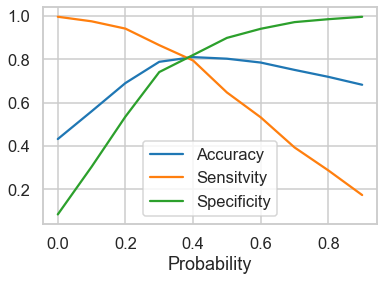

In [76]:
# Ploting line curve of "Accuracy" , "Sensitivity" and "Specificity" for various probabilities(0.0 to 0.9).

df_cutoffs.plot.line(x = "Probability", y = ["Accuracy", "Sensitvity", "Specificity"])   
plt.show()

###### From the above curve, 0.4 is the optimum point for taking probability cutoff as the meeting point is slightly before from 0.4 hence final cutoff we choose is 0.40. Also we can see that there is a trade off between sensitivity and specificity.

In [77]:
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final dataset

y_train_pred_final["Predicted"] = y_train_pred_final["Converted_probability"].map(lambda x:1 if x >0.4 else 0 )  
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
1871,0,0.268197,1871,1,1,1,0,0,0,0,0,0,0,0
6795,0,0.246838,6795,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.303907,3516,1,1,1,1,0,0,0,0,0,0,0
8105,0,0.785984,8105,1,1,1,1,1,1,1,1,0,0,1
3934,0,0.207716,3934,1,1,1,0,0,0,0,0,0,0,0


## Precision and Recall

In [78]:
# Creating confusion matrix to find precision and recall score

confusion_pr = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion_pr

array([[3278,  724],
       [ 508, 1958]], dtype=int64)

In [79]:
# Printing Pecision score and Recall Score

print("Precision", confusion_pr[1,1]/(confusion_pr[0,1]+confusion_pr[1,1]))    
print("Recall", confusion_pr[1,1]/(confusion_pr[1,0]+confusion_pr[1,1]))       

Precision 0.7300521998508576
Recall 0.7939983779399837


###### Important point to be noted from the outcomes for precision and recall score -
###### - Our precison percentage is 73% approximately and recall  percentage is 79%
###### - This means we have very good model which explains relevancy of 73% and true relevant results about 79%.

###### As per our business objective, the recall percentage I will consider more valuable because it is okay if our precision is little low which means less hot lead customers but we don't want to left out any hot leads which are willing to get converted hence our focus on this will be more on Recall than Precision.

### Precision and Recall trade-off

In [80]:
# importing precision recall curve from sklearn library

from sklearn.metrics import precision_recall_curve

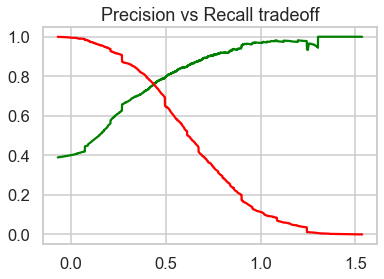

In [81]:
# Plotting precision & recall curve by crreating three points and plotting

p ,r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)
plt.title("Precision vs Recall tradeoff")
plt.plot(thresholds, p[:-1], "g-")    
plt.plot(thresholds, r[:-1], "r-")    
plt.show()

###### As we can see that there is a trade off between Precision and Recall and the meeting point is nearly at 0.5

### RFE Test - 2

In [82]:
# Running RFE for variables 15

rfem2 = RFE(logreg, 15)
rfem2 = rfem2.fit(X_train, y_train)

In [83]:
# checking for true and false assigned to the variables after rfe

list(zip(X_train.columns, rfem2.support_, rfem2.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 24),
 ('Newspaper Article', False, 20),
 ('X Education Forums', False, 46),
 ('Newspaper', False, 12),
 ('Digital Advertisement', False, 13),
 ('Through Recommendations', False, 27),
 ('Lead Origin_Landing Page Submission', False, 45),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 39),
 ('Lead Origin_Quick Add Form', False, 21),
 ('Lead Source_Blog', False, 17),
 ('Lead Source_Click2call', False, 26),
 ('Lead Source_Direct traffic', False, 2),
 ('Lead Source_Facebook', False, 6),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Live chat', False, 52),
 ('Lead Source_Nc_edm', False, 34),
 ('Lead Source_Organic search', False, 4),
 ('Lead Source_Pay per click ads', False, 37),
 ('Lead Source_Press_release', False, 29),
 ('Lead Source_Reference', False, 54),
 ('Lead Source_Referral sites', False, 3),
 ('Lead Source_Social media', False, 22)

In [84]:
# selecting columns only which are 'True' in rfem.support_ i.e True columns were selected for creating a model

col2 = X_train.columns[rfem2.support_]

# Adding constant

X_train_rfe2 = sm.add_constant(X_train[col2])    

In [85]:
# Creating 1st model after RFE

logis_rfe2 = sm.GLM(y_train, X_train_rfe2, family = sm.families.Binomial())
reg_rfe2 = logis_rfe2.fit()
reg_rfe2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2746.8
Date:                Tue, 17 Nov 2020   Deviance:                       5493.6
Time:                        00:29:11   Pearson chi2:                 6.88e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2894      0.065      4.473      0.000       0.163       0.416
Do Not Email                                            -1.3263      0.190     -6.973      0.000      -1.699      -0.954
Total Time Spent on Website                              0.9265      0.035     26.714      0.000       0.859       0.994
Lead Origin_Lead Add Form                                3.3839      0.186     18.172      0.000       3.019       3.749
Lead Source_Welingak website                             1.9606      0.743      2.638      0.008       0.504       3.417
Last Activity_Converted to Lead                         -1.1618      0.221     -5.263      0.000      -1.594      -0.729
Last Activity_Email Bounced                             -1.0321      0.336     -3.068      0.002      -1.691      -0.373
Last Activity_Olark Chat Conversation                   -0.7956      0.191     -4.168      0.000      -1.170      -0.421
What is your current occupation_Housewife               22.7265    1.4e+04      0.002      0.999   -2.74e+04    2.75e+04
What is your current occupation_Working Professional     2.7547      0.187     14.755      0.000       2.389       3.121
Last Notable Activity_Email Link Clicked                -1.7558      0.274     -6.403      0.000      -2.293      -1.218
Last Notable Activity_Email Opened                      -1.2958      0.085    -15.159      0.000      -1.463      -1.128
Last Notable Activity_Had a Phone Conversation           1.8669      1.091      1.711      0.087      -0.272       4.005
Last Notable Activity_Modified                          -1.6631      0.098    -17.055      0.000      -1.854      -1.472
Last Notable Activity_Olark Chat Conversation           -1.3184      0.370     -3.568      0.000      -2.043      -0.594
Last Notable Activity_Page Visited on Website           -1.6038      0.187     -8.582      0.000      -1.970      -1.238
========================================================================================================================
"""

###### Now, From the above summary presented there are some features having high p -values, we will drop features which is having insignificant values one by one and create new model again and again until all the features attain significant p- value.

## Calculating VIF

In [86]:
# Calculating VIFs

vif = pd.DataFrame()
vif["Features"] = X_train_rfe2[col2].columns  
vif["VIF"] = [variance_inflation_factor(X_train_rfe2[col2].values, i) for i in range(X_train_rfe2[col2].shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif   

,Features,VIF
12,Last Notable Activity_Modified,1.85
0,Do Not Email,1.81
5,Last Activity_Email Bounced,1.79
6,Last Activity_Olark Chat Conversation,1.78
2,Lead Origin_Lead Add Form,1.41
13,Last Notable Activity_Olark Chat Conversation,1.32
3,Lead Source_Welingak website,1.24
4,Last Activity_Converted to Lead,1.23
8,What is your current occupation_Working Profes...,1.13
1,Total Time Spent on Website,1.09


###### As we can see that all features are having vif values less than 5, hence there is no multicollinearity issue in the dataset

###### As expained before we will drop the highly in-significant features i.e "What is your current occupation_Housewife" having 0.999 p - value.

In [87]:
# Dropping the most insignificant values ("What is your current occupation_Housewife") and constant

X_train_rfe22 = X_train_rfe2.drop(["const", "What is your current occupation_Housewife"], 1)

In [88]:
# Creating a new model

X_train_rfe22 = sm.add_constant(X_train_rfe22)                              
logis_rfe22 = sm.GLM(y_train,X_train_rfe22, families = sm.families.Binomial()) 
reg_rfe22 = logis_rfe22.fit()                                                 
reg_rfe22.summary()                                                    

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.14139
Method:                          IRLS   Log-Likelihood:                -2843.8
Date:                Tue, 17 Nov 2020   Deviance:                       912.40
Time:                        00:29:11   Pearson chi2:                     912.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5318      0.010     52.675      0.000       0.512       0.552
Do Not Email                                            -0.1751      0.023     -7.651      0.000      -0.220      -0.130
Total Time Spent on Website                              0.1654      0.005     33.650      0.000       0.156       0.175
Lead Origin_Lead Add Form                                0.5120      0.020     25.722      0.000       0.473       0.551
Lead Source_Welingak website                             0.1909      0.044      4.354      0.000       0.105       0.277
Last Activity_Converted to Lead                         -0.1432      0.024     -5.917      0.000      -0.191      -0.096
Last Activity_Email Bounced                             -0.0590      0.033     -1.794      0.073      -0.124       0.005
Last Activity_Olark Chat Conversation                   -0.0713      0.020     -3.640      0.000      -0.110      -0.033
What is your current occupation_Working Professional     0.3447      0.018     18.882      0.000       0.309       0.380
Last Notable Activity_Email Link Clicked                -0.2886      0.036     -8.041      0.000      -0.359      -0.218
Last Notable Activity_Email Opened                      -0.2239      0.013    -17.373      0.000      -0.249      -0.199
Last Notable Activity_Had a Phone Conversation           0.2339      0.114      2.056      0.040       0.011       0.457
Last Notable Activity_Modified                          -0.2796      0.014    -20.409      0.000      -0.306      -0.253
Last Notable Activity_Olark Chat Conversation           -0.2610      0.040     -6.470      0.000      -0.340      -0.182
Last Notable Activity_Page Visited on Website           -0.2784      0.027    -10.501      0.000      -0.330      -0.226
========================================================================================================================
"""

###### Again, we can see from above summary that variable "Last Notable Activity_Had a Phone Conversation" is in-significant hence dropping it and recreating a new model.

In [89]:
# Dropping the most insignificant values ("Last Notable Activity_Had a Phone Conversation") and constant

X_train_rfe23 = X_train_rfe22.drop(["const", "Last Notable Activity_Had a Phone Conversation"], 1)

In [90]:
# Creating a new model

X_train_rfe23 = sm.add_constant(X_train_rfe23)                              
logis_rfe23 = sm.GLM(y_train,X_train_rfe23, families = sm.families.Binomial())  
reg_rfe23 = logis_rfe23.fit()                                                
reg_rfe23.summary()                                                    

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.14146
Method:                          IRLS   Log-Likelihood:                -2845.9
Date:                Tue, 17 Nov 2020   Deviance:                       913.00
Time:                        00:29:12   Pearson chi2:                     913.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5335      0.010     52.996      0.000       0.514       0.553
Do Not Email                                            -0.1758      0.023     -7.681      0.000      -0.221      -0.131
Total Time Spent on Website                              0.1654      0.005     33.655      0.000       0.156       0.175
Lead Origin_Lead Add Form                                0.5113      0.020     25.683      0.000       0.472       0.550
Lead Source_Welingak website                             0.1909      0.044      4.354      0.000       0.105       0.277
Last Activity_Converted to Lead                         -0.1433      0.024     -5.922      0.000      -0.191      -0.096
Last Activity_Email Bounced                             -0.0587      0.033     -1.785      0.074      -0.123       0.006
Last Activity_Olark Chat Conversation                   -0.0714      0.020     -3.644      0.000      -0.110      -0.033
What is your current occupation_Working Professional     0.3450      0.018     18.895      0.000       0.309       0.381
Last Notable Activity_Email Link Clicked                -0.2902      0.036     -8.085      0.000      -0.361      -0.220
Last Notable Activity_Email Opened                      -0.2255      0.013    -17.530      0.000      -0.251      -0.200
Last Notable Activity_Modified                          -0.2811      0.014    -20.543      0.000      -0.308      -0.254
Last Notable Activity_Olark Chat Conversation           -0.2625      0.040     -6.507      0.000      -0.342      -0.183
Last Notable Activity_Page Visited on Website           -0.2799      0.027    -10.561      0.000      -0.332      -0.228
========================================================================================================================
"""

###### Again, from above summary we can see that one variable "Last Activity_Email Bounced" is insignificant hence dropping from the dataset.

In [91]:
# Dropping the most insignificant values ("Last Activity_Email Bounced") and constant

X_train_rfe24 = X_train_rfe23.drop(["const", "Last Activity_Email Bounced"], 1)

In [92]:
# Creating a new model

X_train_rfe24 = sm.add_constant(X_train_rfe24)                              
logis_rfe24 = sm.GLM(y_train,X_train_rfe24, families = sm.families.Binomial()) 
reg_rfe24 = logis_rfe24.fit()                                                
reg_rfe24.summary()                                                   

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.14151
Method:                          IRLS   Log-Likelihood:                -2847.5
Date:                Tue, 17 Nov 2020   Deviance:                       913.45
Time:                        00:29:12   Pearson chi2:                     913.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5344      0.010     53.150      0.000       0.515       0.554
Do Not Email                                            -0.2008      0.018    -11.072      0.000      -0.236      -0.165
Total Time Spent on Website                              0.1653      0.005     33.634      0.000       0.156       0.175
Lead Origin_Lead Add Form                                0.5117      0.020     25.699      0.000       0.473       0.551
Lead Source_Welingak website                             0.1923      0.044      4.384      0.000       0.106       0.278
Last Activity_Converted to Lead                         -0.1402      0.024     -5.808      0.000      -0.188      -0.093
Last Activity_Olark Chat Conversation                   -0.0675      0.019     -3.466      0.001      -0.106      -0.029
What is your current occupation_Working Professional     0.3452      0.018     18.903      0.000       0.309       0.381
Last Notable Activity_Email Link Clicked                -0.2910      0.036     -8.107      0.000      -0.361      -0.221
Last Notable Activity_Email Opened                      -0.2264      0.013    -17.610      0.000      -0.252      -0.201
Last Notable Activity_Modified                          -0.2851      0.014    -21.104      0.000      -0.312      -0.259
Last Notable Activity_Olark Chat Conversation           -0.2661      0.040     -6.603      0.000      -0.345      -0.187
Last Notable Activity_Page Visited on Website           -0.2772      0.026    -10.475      0.000      -0.329      -0.225
========================================================================================================================
"""

###### Now, from the above summary we can say that all the variables present in this model are significant as variables are having p - value equal to 0 hence we can proceed with our next step.

## Creating VIF

In [93]:
# Dropping constant and saving it in new dataset

X_train_rfe0 = X_train_rfe24.drop("const", 1)     

In [94]:
# Checking VIF again just to be sure

vif = pd.DataFrame()                             
vif["Features"] = X_train_rfe0.columns           
vif["VIF"] = [variance_inflation_factor(X_train_rfe0.values,i) for i in range(X_train_rfe0.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif   

,Features,VIF
9,Last Notable Activity_Modified,1.80
5,Last Activity_Olark Chat Conversation,1.76
2,Lead Origin_Lead Add Form,1.40
10,Last Notable Activity_Olark Chat Conversation,1.32
3,Lead Source_Welingak website,1.23
4,Last Activity_Converted to Lead,1.22
0,Do Not Email,1.13
6,What is your current occupation_Working Profes...,1.13
1,Total Time Spent on Website,1.09
8,Last Notable Activity_Email Opened,1.03


###### As we can see that all features are having vif values less than 5, hence there is no multicollinearity issue in the dataset.

### Predicting the train model

In [95]:
# Predicting the train dataset with our final model - rfe with 15 variables

y_train_pred1 = reg_rfe24.predict(X_train_rfe24)

In [96]:
# Creating a new dataset and saving predicted values in it

y_train_pred_final2 = pd.DataFrame({"Converted" : y_train.values, "Converted_probability" : y_train_pred1, "ID" : y_train.index})
y_train_pred_final2.head()  

,Converted,Converted_probability,ID
1871,0,0.161631,1871
6795,0,0.308956,6795
3516,0,0.193698,3516
8105,0,0.760135,8105
3934,0,0.102970,3934


### ROC curve

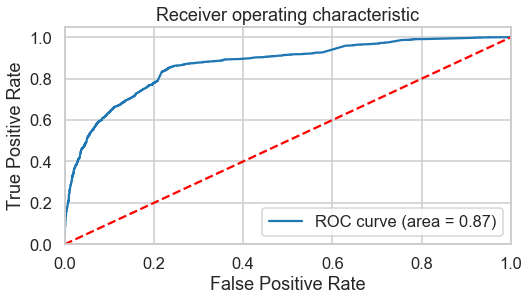

In [97]:
# Plotting the ROC Curve

leads_roc(y_train_pred_final2.Converted, y_train_pred_final2.Converted_probability)

###### Points to be concluded from above roc curve -
###### - The curve is closer to the left side of the border than to the right side hence our model is having great accuracy.
###### - The area under the curve is 87% of the total area.

### Conclusion from RFE Test - 1 & Test - 2

###### Important points to be drawn from both tests - 
###### - For Test - 1, we saw that the auc score is 0.88 in ROC curve plot.
###### - For Test - 2, we saw that the auc score is 0.87 in ROC curve plot.

###### As we all know that AUC measures how true postive rates and false positive rates trade-off. It tells us the model stability. The larger the area, more our model will be able to distinguish classes. Ex - For this case converted or not
###### Which means the model created by RFE test - 1 is the better model or stable model than 2.

### Prediction the test dataset

In [98]:
# Scaling the variables 'Total Time Spent on Website' with standard scaler and tranforming the X - test dataset

X_test[["Total Time Spent on Website"]] = scaler.transform(X_test[["Total Time Spent on Website"]])

In [99]:
# Predicting the test dataset with our final model

test_cols = X_train_4.columns[1:]              
X_test_final = X_test[test_cols]              
X_test_final = sm.add_constant(X_test_final)   
y_pred_test = reg4.predict(X_test_final)       

In [100]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final = pd.DataFrame({"Converted" : y_test.values, "Converted_Probability" : y_pred_test, "ID" : y_test.index})
y_test_pred_final.head()

,Converted,Converted_Probability,ID
4269,1,0.650203,4269
2376,1,0.899467,2376
7766,1,0.735555,7766
9199,0,0.072559,9199
4359,1,0.672628,4359


In [101]:
# Predicting the outcomes with probability cutoff as 0.44 by creating new columns in the final test dataset

y_test_pred_final["Predicted"] = y_test_pred_final["Converted_Probability"].map(lambda x:1 if x >0.44 else 0 )   
y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4269,1,0.650203,4269,1
2376,1,0.899467,2376,1
7766,1,0.735555,7766,1
9199,0,0.072559,9199,0
4359,1,0.672628,4359,1


In [102]:
# Checking the accuracy of the test dataset

# Importing metrics from sklearn

from sklearn import metrics    

In [103]:
# Printing the Accuracy score

print("Accuracy score in predicting test dataset :", metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))   

Accuracy score in predicting test dataset : 0.8152958152958153


In [104]:
# Importing precision and recall score from sklearn

from sklearn.metrics import precision_score, recall_score     

In [105]:
# Printing the precision score

print("Precision score in predicting test dataset:", precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)) 

# Printing the recall score

print("Recall score in predicting test dataset:", recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))      

Precision score in predicting test dataset: 0.7541412380122058
Recall score in predicting test dataset: 0.7899543378995434


### Lead Score assigning

In [106]:
# Creating new columns for lead number and lead score

y_test_pred_final["Lead Number"] = leads.iloc[y_test_pred_final["ID"], 1]
y_test_pred_final["Lead Score"] = y_test_pred_final["Converted_Probability"].apply(lambda x:round(x*100))
y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted,Lead Number,Lead Score
4269,1,0.650203,4269,1,0,65
2376,1,0.899467,2376,1,0,90
7766,1,0.735555,7766,1,0,74
9199,0,0.072559,9199,0,0,7
4359,1,0.672628,4359,1,0,67


### Conclusion

###### Valuable Insights -
###### - The Accuracy, Precision and Recall score we got from test set in aceptable range.
###### - We have high recall score than precision score which we were exactly looking for.
###### - In business terms, this model has an ability to adjust with the company’s requirements in coming future.
###### - This concludes that the model is in stable state.
###### Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
######    - Last Notable Activity_Had a Phone Conversation
######    - Lead Origin_Lead Add Form
######    - What is your current occupation_Working Professional